# Movie Series Sub-Project 1: Movie Data Analysis

<p><b>Author</b>: Jingze Dai</p>
<p><b>McMaster University</b>, Honors Computer Science (Coop) student</p>
<p><b>Personal Email Address</b>: <a>david1147062956@gmail.com</a>, or <a>dai.jingze@icloud.com</a></p>
<a href="https://github.com/daijingz">Github Homepage</a>
<a href="https://www.linkedin.com/in/jingze-dai/">Linkedin Webpage</a>
<a href="https://leetcode.com/david1147062956/">Leetcode Webpage</a>

<i>This sub-project analyze the dataset data with obtained visualized observations.</i>

<i>Your Feedback is important for Jingze's further development. If you want to give feedback and suggestions, or you want to participate in working and learning together, please email Jingze at dai.jingze@icloud.com. If you want Jingze to provide contributions to your research or opensource project or you want Jingze to help you with any programming issues, please email Jingze at david1147062956@gmail.com. Thank you for your help.</i>

### <a class="anchor" id=""><b>Section 1</b>: Dataset sources</a>

<b>Name</b>: TMDB 5000 Movie Dataset
<br>
<b>Source</b>: Kaggle
<br>
<b>Download Link</b>: <a href="https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata">TMDB 5000 Movie Dataset</a>

After downloading the compressed folder, unzip it. The expected situation indicates two datasets: <b>tmdb_5000_credits.csv</b> and <b>tmdb_5000_movies.csv</b> Each dataset contains different information.

Putting these two data files in the same folder with this notebook.

### <a class="anchor" id=""><b>Section 2</b>: Early-stage data observations</a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

print("Existing Datasets: ")
for dirname, _, filenames in os.walk(os.getcwd()):
    for filename in filenames:
        if filename[-4:] == '.csv':
            print(os.path.join(dirname, filename))

Existing Datasets: 
C:\Users\david\Downloads\Movies\tmdb_5000_credits.csv
C:\Users\david\Downloads\Movies\tmdb_5000_movies.csv


<b>Dataset 1 Name</b>: tmdb_5000_credits.csv
<br>
<b>Majority Content</b>: Movie participants' information, including crews and casts.
<br>
<b>Columns</b>: 4

| Columns  | Description   |      Range     | # of Values | All values are unique |
|:---------|---------------|:--------------|:--------|--------:|
| movie_id |      identifier of movies (have unique values)     |  5, 459K |  4813   |       Yes |
| title    |      movie title     |    Complicated   |    4800   |       No |
| cast     |      cast information     | Complicated |     4761   |       No |
| crew     |      crew information     | Complicated |     4776   |       No |

The identifier of each record is the variable "<b>movie_id</b>", ranges from 5 to 459000 and has the integer type. Variable "title" has string values. Variable "cast" and "crew" combines multiple data types, and they do not have specific value ranges.

In [4]:
credit_dataset_path = 'tmdb_5000_credits.csv'
credit_df = pd.read_csv(credit_dataset_path)
print("Number of rows:", credit_df.shape[0])
print("Number of columns:", credit_df.shape[1])
print("\nColumns:")
print(credit_df.columns)
print("\nData Types:")
print(credit_df.dtypes)

Number of rows: 4803
Number of columns: 4

Columns:
Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')

Data Types:
movie_id     int64
title       object
cast        object
crew        object
dtype: object


<b>File Name</b>: tmdb_5000_movies.csv
<br>
<b>Majority Content</b>: Movies' basic information, such as content and budgets
<br>
<b>Columns</b>: 20

In [5]:
major_dataset_path = 'tmdb_5000_movies.csv'
major_df = pd.read_csv(major_dataset_path)
print("Number of rows:", major_df.shape[0])
print("Number of columns:", major_df.shape[1])
print("\nColumns:")
print(major_df.columns)
print("\nData Types:")
print(major_df.dtypes)

Number of rows: 4803
Number of columns: 20

Columns:
Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

Data Types:
budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average       

### <a class="anchor" id=""><b>Section 3</b>: Data Analysis (Part 1)</a>

Before performing normal data analysis, discovering incompleteness, inappropriate values, and conflicts can discover some hidden information inside data. <b>Notice: because this section is about data analysis, there is no need to preprocess or modify data.</b>

In [6]:
import pandas as pd

print("Missing values in each column of the credit data set:")
print(credit_df.isnull().sum())
print("\n")
print("Missing values in each column of the major data set:")
print(major_df.isnull().sum())

Missing values in each column of the credit data set:
movie_id    0
title       0
cast        0
crew        0
dtype: int64


Missing values in each column of the major data set:
budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64


Seems like the credit datset does not have any missing values, but there are a lot of missing information on the major movie information fields. There are 5 features with missing values: `homepage`, `overview`, `release_date`, `runtime`, `tagline`

Then we check whether or not there exists some records with identical values:

In [7]:
credit_duplicate_record = credit_df.duplicated().sum()
print("Creit Dataset Total Records Duplications: " + str(credit_duplicate_record))
major_duplicate_record = major_df.duplicated().sum()
print("Major Dataset Total Records Duplications: " + str(major_duplicate_record))

Creit Dataset Total Records Duplications: 0
Major Dataset Total Records Duplications: 0


Seems like there is no repeated record, however, some features with unique values (e.g., identifiers) cannot allow repeated values. Then we checked these two features: `movie_id` and `id`.

In [8]:
duplicate_rows_1 = credit_df.duplicated(subset=['movie_id']).sum()
print("Duplicated movie_id Rows: " + str(duplicate_rows_1))
duplicate_rows_2 = major_df.duplicated(subset=['id']).sum()
print("Duplicated id Rows: " + str(duplicate_rows_2))

Duplicated movie_id Rows: 0
Duplicated id Rows: 0


By observation, there is no duplication between these identifer values.

### <a class="anchor" id=""><b>Section 4</b>: Data Analysis (Part 2)</a>

Then we discover the range of meaningful numerical values. (including int and float values, IDs do not have any internal meaning).

In this database. there are 6 features with numerical types: `budget`, `popularity`, `revenue`, `runtime`, `vote_average`, and `vote_count`

In [23]:
min_budget = major_df['budget'].min()
max_budget = major_df['budget'].max()
print("Feature `budget` range: [" + str(min_budget) + ", " + str(max_budget) + "]")

Feature `budget` range: [0, 380000000]


In [24]:
min_popularity = major_df['popularity'].min()
max_popularity = major_df['popularity'].max()
print("Feature `popularity` range: [" + str(min_popularity) + ", " + str(max_popularity) + "]")

Feature `popularity` range: [0.0, 875.581305]


In [25]:
min_revenue = major_df['revenue'].min()
max_revenue = major_df['revenue'].max()
print("Feature `revenue` range: [" + str(min_revenue) + ", " + str(max_revenue) + "]")

Feature `revenue` range: [0, 2787965087]


In [26]:
min_runtime = major_df['runtime'].min()
max_runtime = major_df['runtime'].max()
print("Feature `runtime` range: [" + str(min_runtime) + ", " + str(max_runtime) + "]")

Feature `runtime` range: [0.0, 338.0]


In [27]:
min_vote_average = major_df['vote_average'].min()
max_vote_average = major_df['vote_average'].max()
print("Feature `vote_average` range: [" + str(min_vote_average) + ", " + str(max_vote_average) + "]")

Feature `vote_average` range: [0.0, 10.0]


In [37]:
min_vote_count = major_df['vote_count'].min()
max_vote_count = major_df['vote_count'].max()
print("Feature `vote_count` range: [" + str(min_vote_count) + ", " + str(max_vote_count) + "]")

Feature `vote_count` range: [0, 13752]


For these features, we divided each of their distributions in more than 20 equal-size intervals:

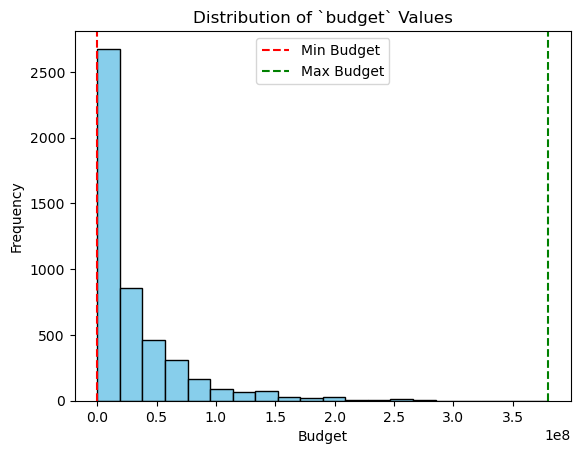

In [44]:
import matplotlib.pyplot as plt

min_budget = major_df['budget'].min()
max_budget = major_df['budget'].max()

plt.hist(major_df['budget'], bins=20, color='skyblue', edgecolor='black')

plt.xlabel('Budget')
plt.ylabel('Frequency')
plt.title('Distribution of `budget` Values')

plt.axvline(x=min_budget, color='red', linestyle='--', label='Min Budget')
plt.axvline(x=max_budget, color='green', linestyle='--', label='Max Budget')

plt.legend()
plt.show()

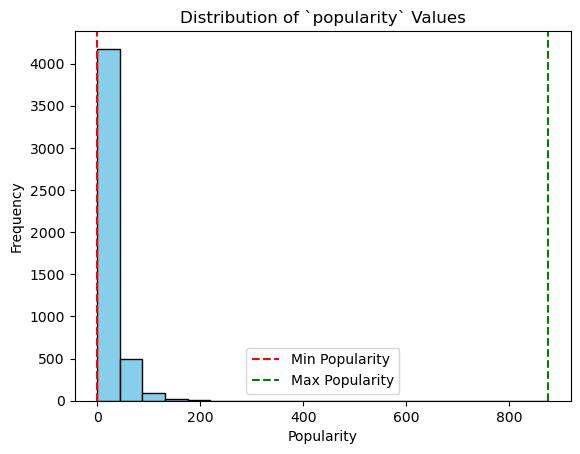

In [45]:
import matplotlib.pyplot as plt

min_popularity = major_df['popularity'].min()
max_popularity = major_df['popularity'].max()

plt.hist(major_df['popularity'], bins=20, color='skyblue', edgecolor='black')

plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.title('Distribution of `popularity` Values')

plt.axvline(x=min_popularity, color='red', linestyle='--', label='Min Popularity')
plt.axvline(x=max_popularity, color='green', linestyle='--', label='Max Popularity')

plt.legend()
plt.show()

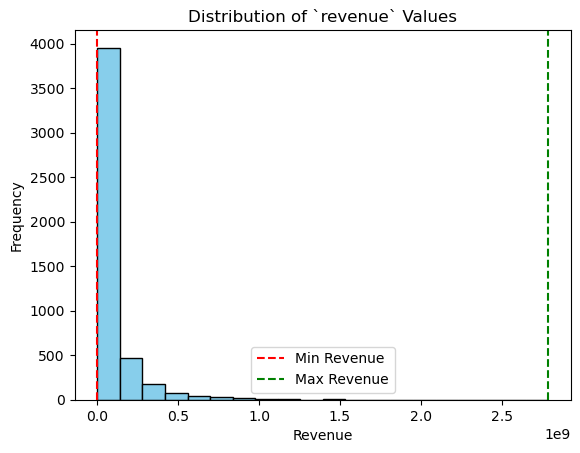

In [46]:
import matplotlib.pyplot as plt

min_revenue = major_df['revenue'].min()
max_revenue = major_df['revenue'].max()

plt.hist(major_df['revenue'], bins=20, color='skyblue', edgecolor='black')

plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.title('Distribution of `revenue` Values')

plt.axvline(x=min_revenue, color='red', linestyle='--', label='Min Revenue')
plt.axvline(x=max_revenue, color='green', linestyle='--', label='Max Revenue')

plt.legend()
plt.show()

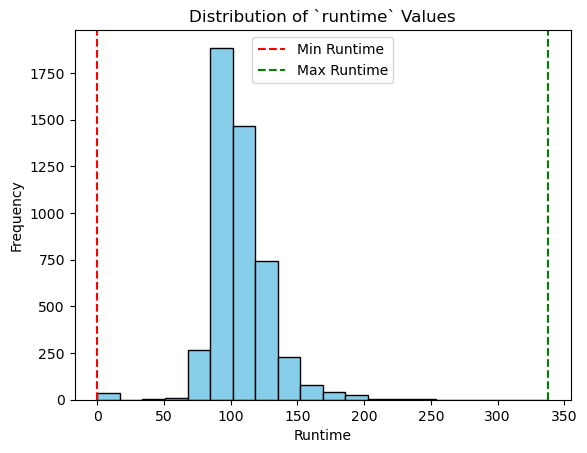

In [47]:
import matplotlib.pyplot as plt

min_runtime = major_df['runtime'].min()
max_runtime = major_df['runtime'].max()

plt.hist(major_df['runtime'], bins=20, color='skyblue', edgecolor='black')

plt.xlabel('Runtime')
plt.ylabel('Frequency')
plt.title('Distribution of `runtime` Values')

plt.axvline(x=min_runtime, color='red', linestyle='--', label='Min Runtime')
plt.axvline(x=max_runtime, color='green', linestyle='--', label='Max Runtime')

plt.legend()
plt.show()

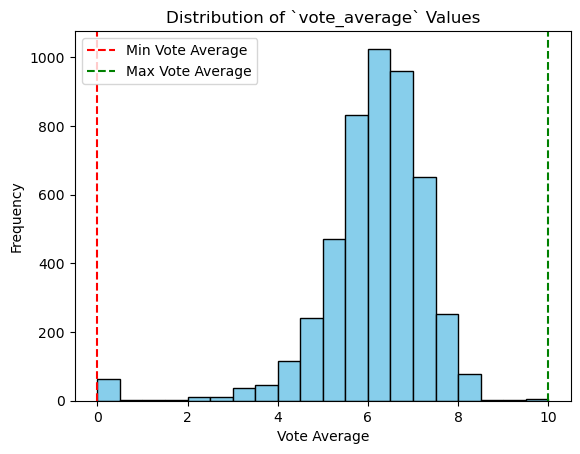

In [48]:
import matplotlib.pyplot as plt

min_vote_average = major_df['vote_average'].min()
max_vote_average = major_df['vote_average'].max()

plt.hist(major_df['vote_average'], bins=20, color='skyblue', edgecolor='black')

plt.xlabel('Vote Average')
plt.ylabel('Frequency')
plt.title('Distribution of `vote_average` Values')

plt.axvline(x=min_vote_average, color='red', linestyle='--', label='Min Vote Average')
plt.axvline(x=max_vote_average, color='green', linestyle='--', label='Max Vote Average')

plt.legend()
plt.show()

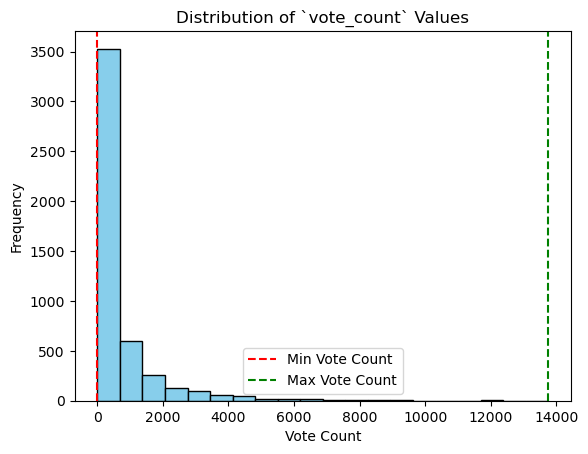

In [49]:
import matplotlib.pyplot as plt

min_vote_count = major_df['vote_count'].min()
max_vote_count = major_df['vote_count'].max()

plt.hist(major_df['vote_count'], bins=20, color='skyblue', edgecolor='black')

plt.xlabel('Vote Count')
plt.ylabel('Frequency')
plt.title('Distribution of `vote_count` Values')

plt.axvline(x=min_vote_count, color='red', linestyle='--', label='Min Vote Count')
plt.axvline(x=max_vote_count, color='green', linestyle='--', label='Max Vote Count')

plt.legend()
plt.show()